In [2]:
####### Importation des packages #########
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Ouvrir le fichier NetCDF contenant les données SST
ds = xr.open_mfdataset("./my_data_folder/eursst_folder/*.nc", combine="by_coords")

# Extraction des températures analysées (analysed_sst)
sst = ds["analysed_sst"]

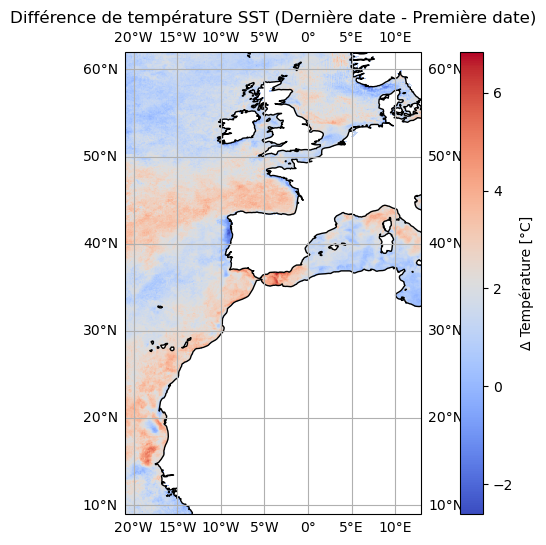

In [3]:
# Sélection des dates extrêmes
sst_oldest = sst.isel(time=0)  # Première date
sst_latest = sst.isel(time=-1) # Dernière date

# Calcul de la différence de température
sst_diff = sst_latest - sst_oldest

# Création de la figure
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={"projection": ccrs.PlateCarree()})
ax.set_extent([-21, 13, 9, 62], crs=ccrs.PlateCarree())  # Définition de l'étendue des données

# Ajout de la différence de température
c = ax.pcolormesh(sst_diff.lon, sst_diff.lat, sst_diff, cmap="coolwarm", transform=ccrs.PlateCarree())

# Ajout des côtes et grilles
ax.add_feature(cfeature.COASTLINE, linewidth=1)
ax.gridlines(draw_labels=True)

# Ajout d'une barre de couleur
cbar = plt.colorbar(c, ax=ax, orientation="vertical", fraction=0.05, pad=0.05)
cbar.set_label("Δ Température [°C]")

# Titre
plt.title("Différence de température SST (Dernière date - Première date)")

# Affichage
plt.savefig("./my_data_folder/diff_sst_map.png", bbox_inches="tight", dpi=300)
plt.show()

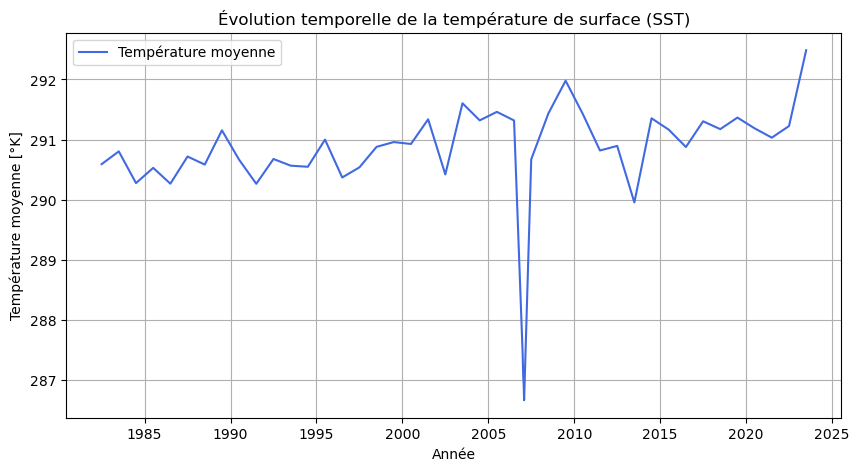

In [5]:
# Moyenne spatiale sur toute la région
sst_mean = sst.mean(dim=["lat", "lon"])

# Création du graphique
plt.figure(figsize=(10, 5))
plt.plot(sst_mean.time, sst_mean, label="Température moyenne", color="royalblue")

# Ajout des labels et titre
plt.xlabel("Année")
plt.ylabel("Température moyenne [°K]")
plt.title("Évolution temporelle de la température de surface (SST)")
plt.legend()
plt.grid()

# Enregistrement de l'image
plt.savefig("./my_data_folder/sst_time_series.png", bbox_inches="tight", dpi=300)

# Affichage
plt.show()

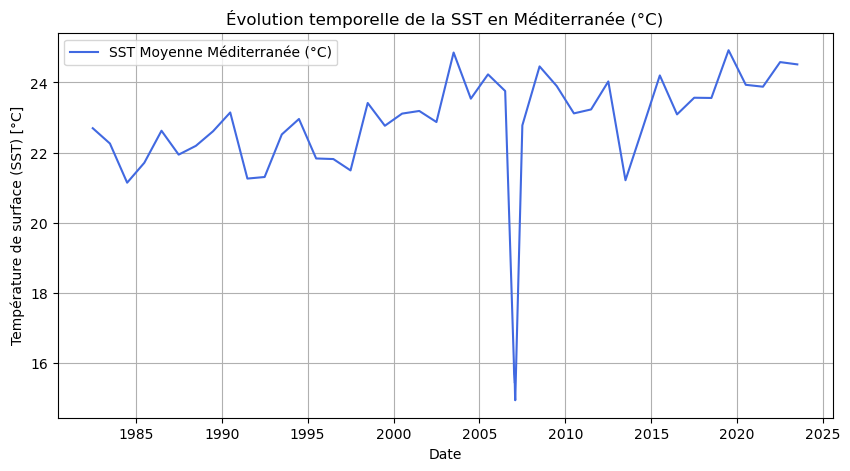

In [4]:
# Définir les limites géographiques de la Méditerranée
lat_min = 30   # Latitude minimale (30°N)
lat_max = 45   # Latitude maximale (45°N)
lon_min = -5   # Longitude minimale (5°W)
lon_max = 37   # Longitude maximale (37°E)

# Extraire les données SST dans la zone méditerranéenne
sst_mediterranean = sst.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

# Calculer la moyenne de la SST sur cette zone (moyenne spatiale)
sst_mean_mediterranean = sst_mediterranean.mean(dim=["lat", "lon"])

# Création du graphique pour l'évolution temporelle de la SST moyenne en Méditerranée en Celsius
plt.figure(figsize=(10, 5))
plt.plot(sst_mean_mediterranean.time, sst_mean_mediterranean - 273.15, label="SST Moyenne Méditerranée (°C)", color="royalblue")

# Ajout des labels et du titre
plt.xlabel("Date")
plt.ylabel("Température de surface (SST) [°C]")
plt.title("Évolution temporelle de la SST en Méditerranée (°C)")
plt.legend()
plt.grid()

# Affichage
plt.show()





Visualization medsea data

In [6]:
!pip install xarray netCDF4 numpy matplotlib cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 44.3 MB/s eta 0:00:00


In [10]:
import xarray as xr
import os
import matplotlib.pyplot as plt

temp_dir = "./my_data_folder/medsea_annual_data/température"
sal_dir = "./my_data_folder/medsea_annual_data/salinité"

# Charger et concaténer les fichiers
temp_files = sorted([os.path.join(temp_dir, f) for f in os.listdir(temp_dir) if f.endswith(".nc")])
sal_files = sorted([os.path.join(sal_dir, f) for f in os.listdir(sal_dir) if f.endswith(".nc")])

ds_temp = xr.open_mfdataset(temp_files, combine="by_coords")
ds_sal = xr.open_mfdataset(sal_files, combine="by_coords")

# Afficher les variables disponibles
print("Variables Température :", ds_temp.data_vars.keys())
print("Variables Salinité :", ds_sal.data_vars.keys())


Variables Température : KeysView(Data variables:
    thetao   (time, depth, lat, lon) float32 8GB dask.array<chunksize=(1, 36, 95, 254), meta=np.ndarray>
    bottomT  (time, lat, lon) float32 56MB dask.array<chunksize=(1, 380, 1016), meta=np.ndarray>)
Variables Salinité : KeysView(Data variables:
    so       (time, depth, lat, lon) float32 8GB dask.array<chunksize=(1, 36, 95, 254), meta=np.ndarray>)


In [13]:
# Moyenne spatiale pour la Température (variable thetao)
temp_mean = ds_temp['thetao'].mean(dim=["lat", "lon"])

# Moyenne spatiale pour la Salinité (variable so)
sal_mean = ds_sal['so'].mean(dim=["lat", "lon"])

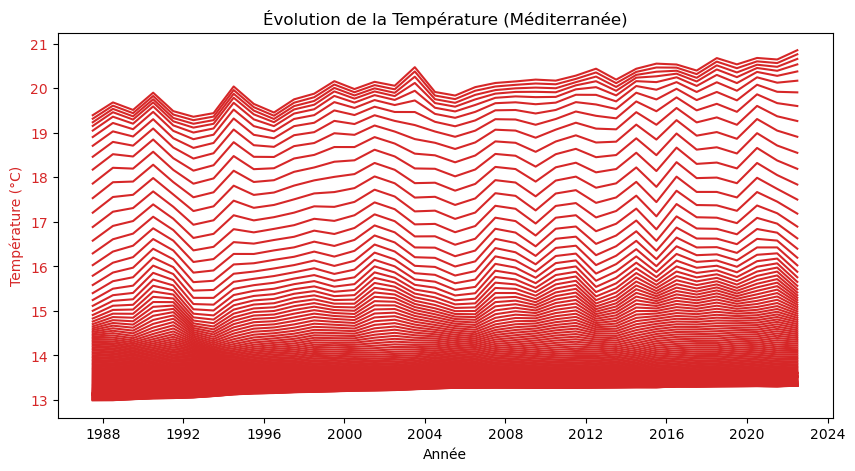

In [14]:
# Tracer l'évolution de la Température (seul graphique pour la température)
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_xlabel('Année')
ax.set_ylabel('Température (°C)', color='tab:red')
ax.plot(temp_mean['time'], temp_mean, color='tab:red', label="Température")
ax.tick_params(axis='y', labelcolor='tab:red')

plt.title("Évolution de la Température (Méditerranée)")
plt.savefig("evolution_temp.png", dpi=300, bbox_inches="tight")
plt.show()

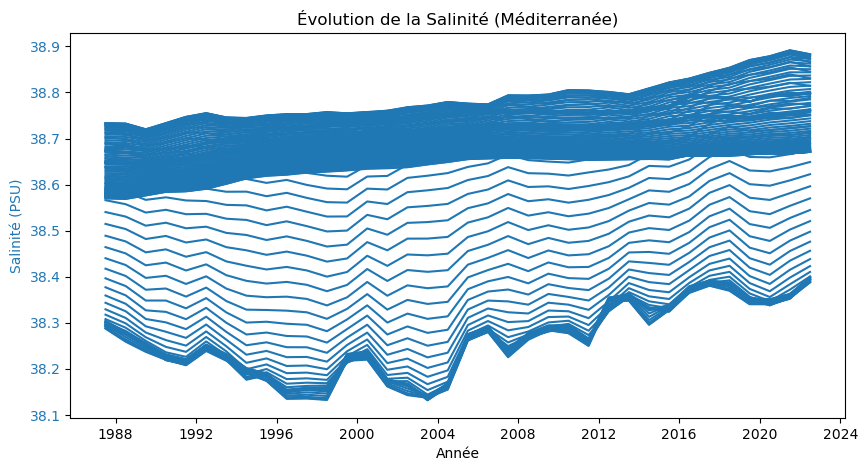

In [15]:
# Tracer l'évolution de la Salinité (seul graphique pour la salinité)
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_xlabel('Année')
ax.set_ylabel('Salinité (PSU)', color='tab:blue')
ax.plot(sal_mean['time'], sal_mean, color='tab:blue', label="Salinité")
ax.tick_params(axis='y', labelcolor='tab:blue')

plt.title("Évolution de la Salinité (Méditerranée)")
plt.savefig("evolution_sal.png", dpi=300, bbox_inches="tight")
plt.show()

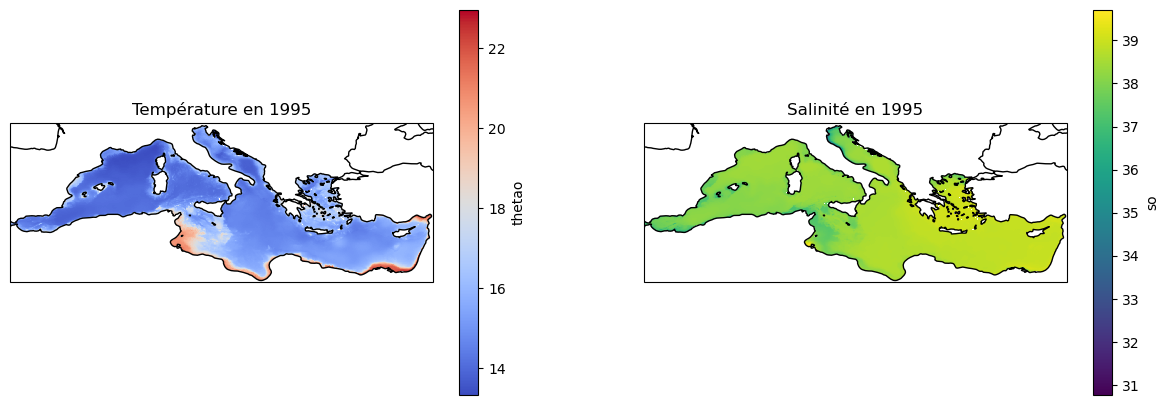

In [19]:
# Sélectionner une année pour la carte
year = 1995

# Extraire les cartes pour la température et la salinité en moyenne sur la profondeur
temp_map = ds_temp['thetao'].sel(time=str(year)).mean(dim="depth")
sal_map = ds_sal['so'].sel(time=str(year)).mean(dim="depth")

# Tracer les cartes
fig, ax = plt.subplots(1, 2, figsize=(15, 5), subplot_kw={'projection': ccrs.PlateCarree()})

# Carte Température
temp_map.plot(ax=ax[0], cmap="coolwarm", transform=ccrs.PlateCarree())
ax[0].coastlines()
ax[0].set_title(f"Température en {year}")

# Carte Salinité
sal_map.plot(ax=ax[1], cmap="viridis", transform=ccrs.PlateCarree())
ax[1].coastlines()
ax[1].set_title(f"Salinité en {year}")

# Sauvegarde de l'image
plt.savefig(f"map_temp_sal_{year}.png", dpi=300, bbox_inches="tight")
plt.show()

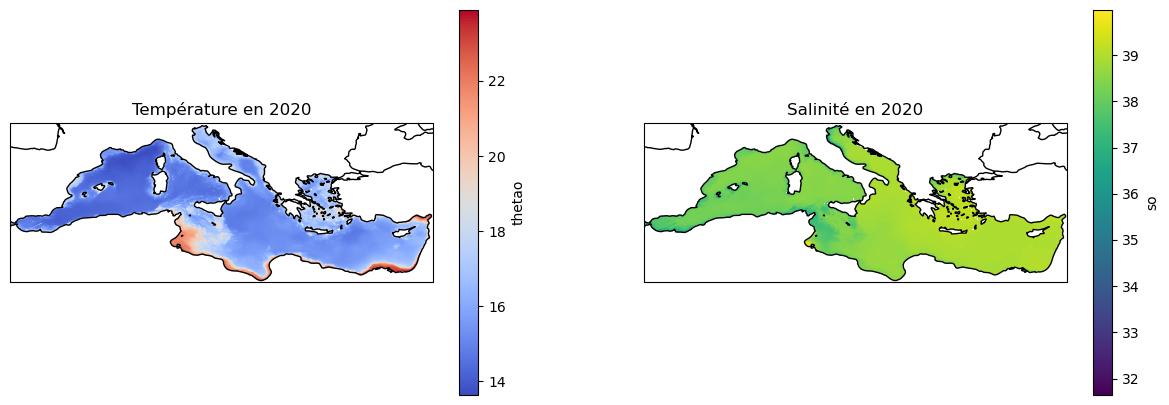

In [18]:
# Sélectionner une année pour la carte
year = 2020

# Extraire les cartes pour la température et la salinité en moyenne sur la profondeur
temp_map = ds_temp['thetao'].sel(time=str(year)).mean(dim="depth")
sal_map = ds_sal['so'].sel(time=str(year)).mean(dim="depth")

# Tracer les cartes
fig, ax = plt.subplots(1, 2, figsize=(15, 5), subplot_kw={'projection': ccrs.PlateCarree()})

# Carte Température
temp_map.plot(ax=ax[0], cmap="coolwarm", transform=ccrs.PlateCarree())
ax[0].coastlines()
ax[0].set_title(f"Température en {year}")

# Carte Salinité
sal_map.plot(ax=ax[1], cmap="viridis", transform=ccrs.PlateCarree())
ax[1].coastlines()
ax[1].set_title(f"Salinité en {year}")

# Sauvegarde de l'image
plt.savefig(f"map_temp_sal_{year}.png", dpi=300, bbox_inches="tight")
plt.show()

TypeError: No numeric data to plot.

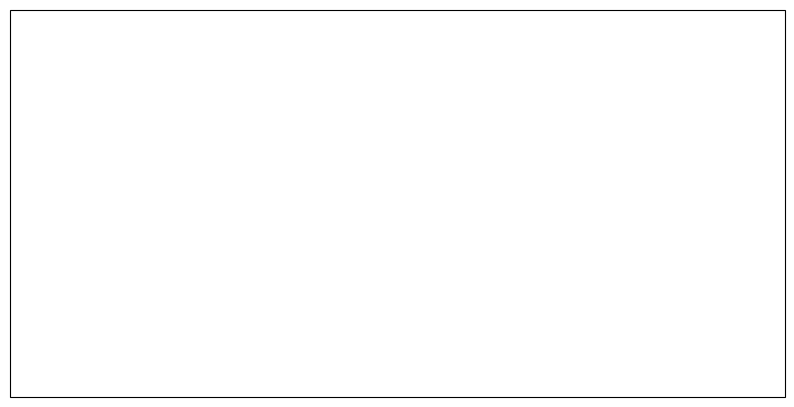

In [23]:
# Sélectionner les données de température pour 2002 et 2022
# Extraire les cartes pour la température et la salinité en moyenne sur la profondeur
temp_map_2002 = ds_temp['thetao'].sel(time=str(2002)).mean(dim="depth")
temp_map_2022 = ds_temp['thetao'].sel(time=str(2022)).mean(dim="depth")

# Calculer la différence de température
temp_diff = temp_map_2022 - temp_map_2002

# Tracer la carte de différence de température
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Tracer la différence de température avec une palette de couleurs
temp_diff.plot(ax=ax, cmap="coolwarm", transform=ccrs.PlateCarree(), cbar_kwargs={'label': 'Différence de Température (°C)'})

# Ajouter des éléments à la carte
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_title(f"Différence de Température entre 2022 et 2002")

# Afficher la carte
plt.savefig(f"Différence de Température entre 2022 et 2002")
plt.show()


<xarray.DataArray 'thetao' (time: 0, lat: 380, lon: 1016)> Size: 0B
dask.array<sub, shape=(0, 380, 1016), dtype=float32, chunksize=(0, 95, 254), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 4kB -6.0 -5.958 -5.917 -5.875 ... 36.21 36.25 36.29
  * lat      (lat) float32 2kB 30.19 30.23 30.27 30.31 ... 45.9 45.94 45.98
  * time     (time) datetime64[ns] 0B 
Dimensions de temp_diff :  ('time', 'lat', 'lon')
Type des données de temp_diff :  float32
<xarray.DataArray 'thetao' (lat: 380, lon: 1016)> Size: 2MB
dask.array<mean_agg-aggregate, shape=(380, 1016), dtype=float32, chunksize=(95, 254), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 4kB -6.0 -5.958 -5.917 -5.875 ... 36.21 36.25 36.29
  * lat      (lat) float32 2kB 30.19 30.23 30.27 30.31 ... 45.9 45.94 45.98


/opt/conda/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


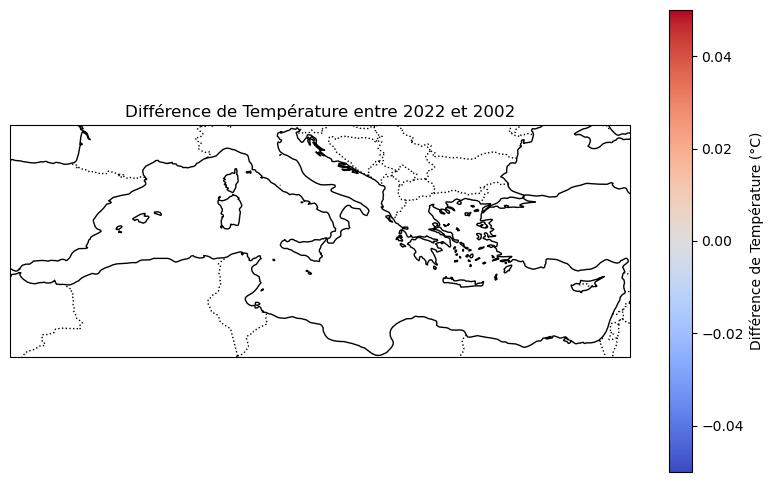

In [24]:
# Vérifier si temp_diff a des données numériques et des dimensions
print(temp_diff)
print("Dimensions de temp_diff : ", temp_diff.dims)
print("Type des données de temp_diff : ", temp_diff.dtype)

# Assure-toi que temp_diff a une variable temporelle et que ses dimensions sont correctes
if 'time' in temp_diff.dims:
    temp_diff = temp_diff.mean(dim="time")  # Si tu veux une moyenne temporelle
else:
    print("La différence de température n'a pas la dimension 'time'.")
    
# Afficher les données avant de tracer
print(temp_diff)

# Tracer la carte de différence de température après vérification
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Tracer la différence de température avec une palette de couleurs
temp_diff.plot(ax=ax, cmap="coolwarm", transform=ccrs.PlateCarree(), cbar_kwargs={'label': 'Différence de Température (°C)'})

# Ajouter des éléments à la carte
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_title(f"Différence de Température entre 2022 et 2002")

# Afficher la carte
plt.show()


In [26]:
# Afficher les valeurs de température pour vérifier les données
print(ds_temp['thetao'].sel(time="2000-01-01").values)  # Affiche les valeurs pour l'année 2000
print(ds_temp['thetao'].sel(time="2001-01-01").values)  # Affiche les valeurs pour l'année 2001

[]
[]
